# FINAL PROJECT 

**Data Source** https://www.kaggle.com/datasets/psparks/instacart-market-basket-analysis/data  
**Github** https://github.com/cliff003/DTSA5510

**Goal:** Instacart Market Basket Analysis is a Kaggle dataset contains orders and products information in Instacart. In this project, I would like to explore this dataset and build a recommended system for users to predict their next purchase using unsupervised machine learning algorithms.

In [1]:
#import important libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

#modeling
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules

In [2]:
#label file paths
current_dir = os.getcwd()
path_dir = os.path.join(current_dir, 'data/')
aisles_path = path_dir + 'aisles.csv'
departments_path = path_dir + 'departments.csv'
order_products_prior_path = path_dir + 'order_products__prior.csv'
order_products_train_path = path_dir + 'order_products__train.csv'
orders_path = path_dir + 'orders.csv'
products_path = path_dir + 'products.csv'

In [3]:
#import data
aisles = pd.read_csv(aisles_path)
departments = pd.read_csv(departments_path)
order_products_prior = pd.read_csv(order_products_prior_path)
order_products_train = pd.read_csv(order_products_train_path)
orders = pd.read_csv(orders_path)
products = pd.read_csv(products_path)

________
# 1. Exploratory Analysis (EDA)
_____

## 1.1 Check data files

This dataset has 6 sepearate csv files, every file is checked to see the detail information about. 

### 1.1.1 Check aisles

In [4]:
# First few rows for aisles
aisles.head(10)

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
5,6,other
6,7,packaged meat
7,8,bakery desserts
8,9,pasta sauce
9,10,kitchen supplies


In [5]:
# Summary of the dataframe
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


Aisles file contains id and aisle name, it is a supplement file for the dataset.

### 1.1.2 Check departments

In [6]:
# First few rows for departments
departments.head(10)

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [7]:
# Summary of the dataframe
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


Departments file contains id and department name, it is a supplement file for the dataset

### 1.1.3 Check products

In [8]:
# First few rows for productss
products.head(10)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
5,6,Dry Nose Oil,11,11
6,7,Pure Coconut Water With Orange,98,7
7,8,Cut Russet Potatoes Steam N' Mash,116,1
8,9,Light Strawberry Blueberry Yogurt,120,16
9,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7


In [9]:
# Summary of the dataframe
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


Products file contains product id, product name, aisle id and department id. It is the main files for products. 

### 1.1.4 Check orders

In [10]:
# First few rows for orders
orders.head(10)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [11]:
# Summary of the dataframe
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


In [12]:
# Statistical summary for numerical columns
orders.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.214874e+06
mean,1.710542e+06,1.029782e+05,1.715486e+01,2.776219e+00,1.345202e+01,1.111484e+01
std,9.875817e+05,5.953372e+04,1.773316e+01,2.046829e+00,4.226088e+00,9.206737e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.552715e+05,5.139400e+04,5.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00
50%,1.710542e+06,1.026890e+05,1.100000e+01,3.000000e+00,1.300000e+01,7.000000e+00
75%,2.565812e+06,1.543850e+05,2.300000e+01,5.000000e+00,1.600000e+01,1.500000e+01
max,3.421083e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01


In [13]:
# Check unique values for 'eval_set'
orders['eval_set'].unique()

array(['prior', 'train', 'test'], dtype=object)

In [14]:
prior_num = len(orders[orders['eval_set'] == 'prior'])
train_num = len(orders[orders['eval_set'] == 'train'])
test_num = len(orders[orders['eval_set'] == 'test'])
print(f'Orders data has {prior_num} prior data, {train_num} train data, and {test_num} test data.')

Orders data has 3214874 prior data, 131209 train data, and 75000 test data.


The meanings of the variables in the Orders data are as follows:

| Variable Name            | Description                                                                                                              |
|--------------------------|--------------------------------------------------------------------------------------------------------------------------|
| **order_id**             | A unique ID for each order.                                                                                              |
| **user_id**              | A unique ID of the user.                                                                                                 |
| **eval_set**             | Specifies the type of the dataset, which can be "prior", "train", or "test".                                             |
| **prior**                | Represents past orders of users; part of the dataset used for understanding historical data.                             |
| **train**                | Represents the training dataset where the model learns; used during the training phase.                                 |
| **test**                 | Represents the test dataset used to evaluate the model's performance and make predictions on unseen data.               |
| **order_number**         | Indicates the sequence number of the user’s order.                                                                      |
| **order_dow**            | Day of the week the order was made, represented as a number from 0 (Sunday) to 6 (Saturday).                            |
| **order_hour_of_day**    | The hour of the day the order was made, represented as a number from 0 to 23.                                           |
| **days_since_prior_order** | Number of days between this order and the previous order; NaN if it's the user's first order.                          |

In [15]:
# Check for NUll value in orders
orders.isnull().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [16]:
# Check for duplicated values
orders.duplicated().sum()

0

Orders data only has null values in 'days_since_prior_order' and does not have any duplicate. It is a clean data already and can be further processed later.

### 1.1.5 Check order_products_prior

In [17]:
# First few rows for order_products_prior
order_products_prior.head(10)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
5,2,17794,6,1
6,2,40141,7,1
7,2,1819,8,1
8,2,43668,9,0
9,3,33754,1,1


In [18]:
# Summary of the dataframe
order_products_prior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 989.8 MB


The meanings of the variables in the order_products_prior data are as follows:

| Variable Name        | Description                                                                                              |
|----------------------|----------------------------------------------------------------------------------------------------------|
| **order_id**         | Identifies the unique ID of the order in which the product was purchased.                                |
| **product_id**       | Identifies the unique ID of the product that was purchased.                                              |
| **add_to_cart_order**| Indicates the sequence in which the product was added to the cart during the order process.              |
| **reordered**        | Indicates whether the product has been previously ordered by the customer. `0` = No, `1` = Yes.          |


### 1.1.6 Check order_products_train

In [19]:
# First few rows for order_products_train
order_products_train.head(10)

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
5,1,13176,6,0
6,1,47209,7,0
7,1,22035,8,1
8,36,39612,1,0
9,36,19660,2,1


In [20]:
order_products_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           1384617 non-null  int64
 1   product_id         1384617 non-null  int64
 2   add_to_cart_order  1384617 non-null  int64
 3   reordered          1384617 non-null  int64
dtypes: int64(4)
memory usage: 42.3 MB


The train data is similar to the prior data, with same feature descriptions.

Overall data description:  

<img src=https://raw.githubusercontent.com/cliff003/DTSA5510/main/images/description.png width=1000 alt="description">  

## 1.2 Merge dataset

After checking data files, some of the files can be merged together to be processed.

In [21]:
# Merge order and order_products
df = pd.merge(order_products_prior, orders, how='inner', on='order_id')
df.head(10)

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,202279,prior,3,5,9,8.0
1,2,28985,2,1,202279,prior,3,5,9,8.0
2,2,9327,3,0,202279,prior,3,5,9,8.0
3,2,45918,4,1,202279,prior,3,5,9,8.0
4,2,30035,5,0,202279,prior,3,5,9,8.0
5,2,17794,6,1,202279,prior,3,5,9,8.0
6,2,40141,7,1,202279,prior,3,5,9,8.0
7,2,1819,8,1,202279,prior,3,5,9,8.0
8,2,43668,9,0,202279,prior,3,5,9,8.0
9,3,33754,1,1,205970,prior,16,5,17,12.0


In [22]:
# Merge products, aisles and departments
products = pd.merge(products, aisles, how='left', on='aisle_id')
products = pd.merge(products, departments, how='left', on='department_id') 
products.head(10)

,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,2,All-Seasons Salt,104,13,spices seasonings,pantry
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals,frozen
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation,pantry
5,6,Dry Nose Oil,11,11,cold flu allergy,personal care
6,7,Pure Coconut Water With Orange,98,7,juice nectars,beverages
7,8,Cut Russet Potatoes Steam N' Mash,116,1,frozen produce,frozen
8,9,Light Strawberry Blueberry Yogurt,120,16,yogurt,dairy eggs
9,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7,water seltzer sparkling water,beverages


## 1.3 Data exploration

In [23]:
# Count the frequency of each product ID in the DataFrame
product_counts = df['product_id'].value_counts()
product_counts = product_counts.reset_index()
product_counts.columns = ['product_id', 'count']
product_counts = pd.merge(product_counts, products, how='left', on='product_id')[[ 'product_name', 'product_id', 'count', 'department', 'aisle']]

# Show 10 most frequent products
product_counts.head(10)


,product_name,product_id,count,department,aisle
0,Banana,24852,472565,produce,fresh fruits
1,Bag of Organic Bananas,13176,379450,produce,fresh fruits
2,Organic Strawberries,21137,264683,produce,fresh fruits
3,Organic Baby Spinach,21903,241921,produce,packaged vegetables fruits
4,Organic Hass Avocado,47209,213584,produce,fresh fruits
5,Organic Avocado,47766,176815,produce,fresh fruits
6,Large Lemon,47626,152657,produce,fresh fruits
7,Strawberries,16797,142951,produce,fresh fruits
8,Limes,26209,140627,produce,fresh fruits
9,Organic Whole Milk,27845,137905,dairy eggs,milk


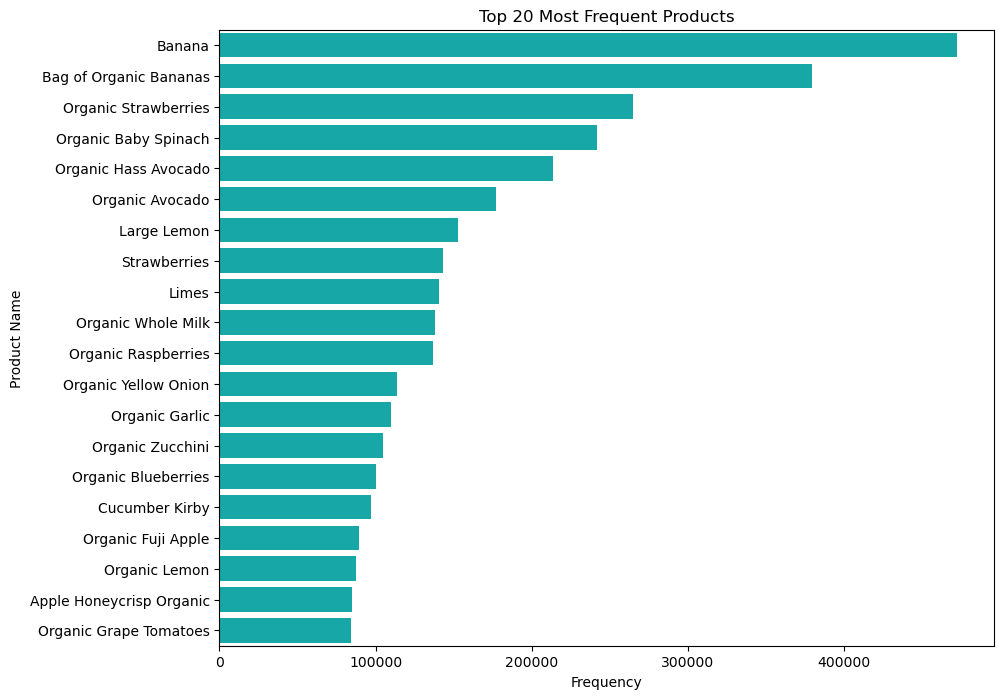

In [24]:
# Plot 20 most frequent products
plt.figure(figsize=(10, 8))
sns.barplot(x='count', y='product_name', data=product_counts.head(20), color='c')
plt.title('Top 20 Most Frequent Products')
plt.xlabel('Frequency')
plt.ylabel('Product Name')
plt.show()



This plot shows top 20 most frequent products. However, we can see that all of them are fruits and vegetables. So, it need to be further explored for every departments and aisles.

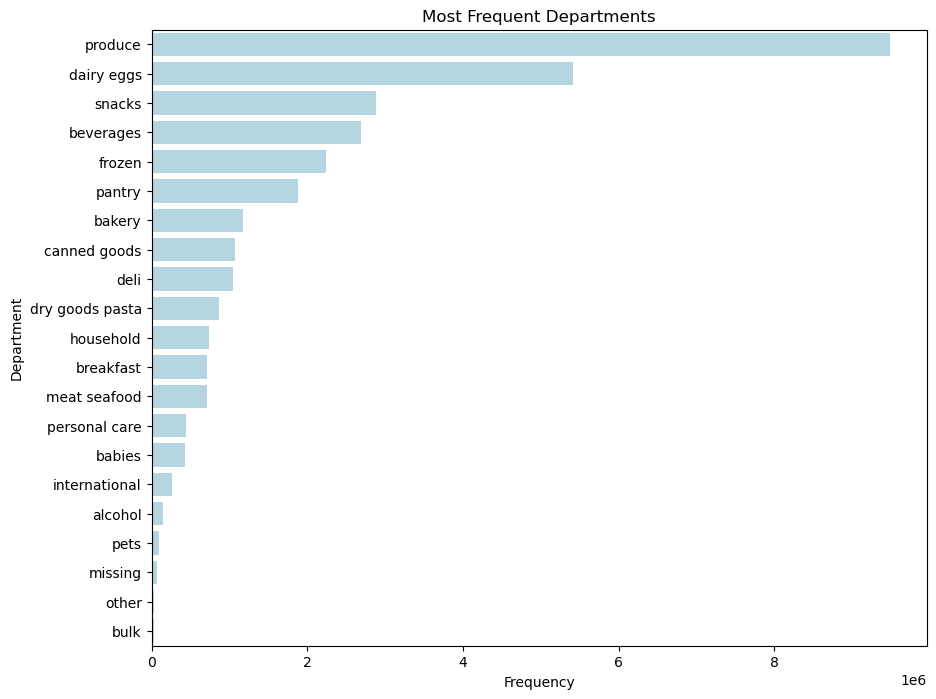

In [25]:
# Plot departments
department_counts = product_counts.groupby('department')['count'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 8))
sns.barplot(x='count', y='department', data=department_counts, color='lightblue')  # Using a single color
plt.title('Most Frequent Departments')
plt.xlabel('Frequency')
plt.ylabel('Department')
plt.show()


From this chart, majority of the products are from produce and dairy eggs departments. The sum of frequencies in these two departments weights more than half of the total dataset.

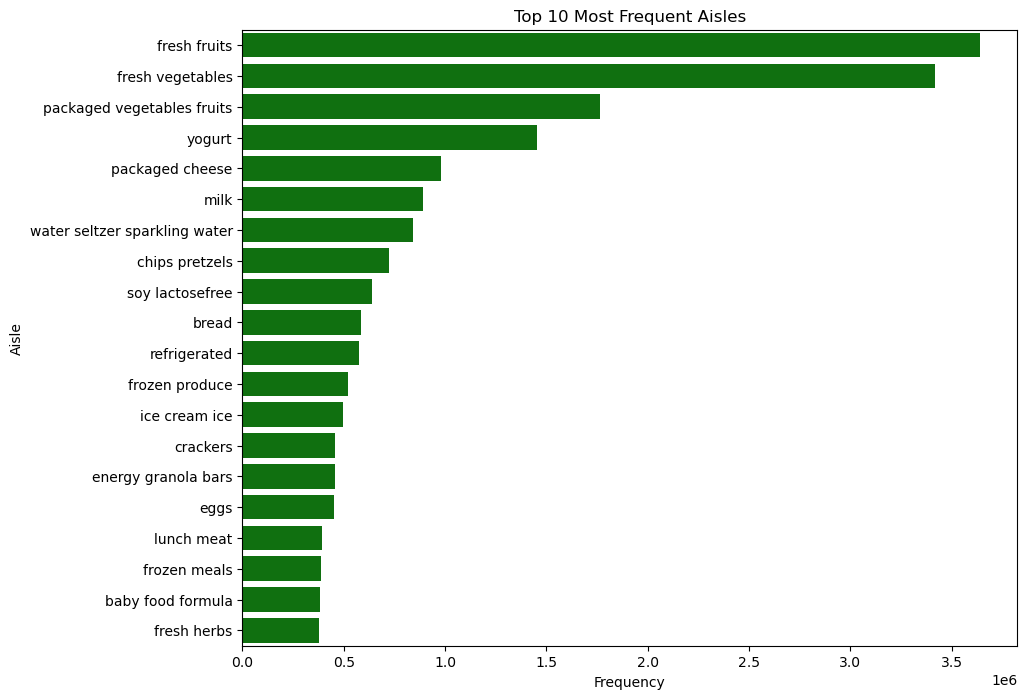

In [26]:
# Plot 20 most frequent aisles
aisle_counts = product_counts.groupby('aisle')['count'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 8))
sns.barplot(x='count', y='aisle', data=aisle_counts.head(20), color='green') 
plt.title('Top 10 Most Frequent Aisles')
plt.xlabel('Frequency')
plt.ylabel('Aisle')
plt.show()


These plots show that the dataset is kind of imbalanced, the produce department dominates the numbers of products. Fresh fruits and vegetables are the most frequent aisles with very large amounts values compared with others. It tells that this dataset is not balanced, and it may impact the training of unsupervised machine learning algorithms.

In [27]:
test_df = orders[orders['eval_set'] == 'train']
test_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
10,1187899,1,train,11,4,8,14.0
25,1492625,2,train,15,1,11,30.0
49,2196797,5,train,5,0,11,6.0
74,525192,7,train,21,2,11,6.0
78,880375,8,train,4,1,14,10.0


In [28]:
orders[orders['user_id'] == 6]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
50,2086598,6,prior,1,5,18,NaN
51,298250,6,prior,2,4,16,6.0
52,998866,6,prior,3,2,18,12.0
53,1528013,6,test,4,3,16,22.0


-------
# 2. Model Building and Training 
-----



In [29]:
df = df.drop(['eval_set', 'add_to_cart_order', 'reordered'], axis=1)

In [30]:
transactions = df.groupby('order_id')['product_id'].apply(list).tolist()

In [31]:
# Show sample transactions
transactions[:3]

[[33120, 28985, 9327, 45918, 30035, 17794, 40141, 1819, 43668],
 [33754, 24838, 17704, 21903, 17668, 46667, 17461, 32665],
 [46842,
  26434,
  39758,
  27761,
  10054,
  21351,
  22598,
  34862,
  40285,
  17616,
  25146,
  32645,
  41276]]

In [32]:
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions, sparse=True)


In [33]:
# Create the matrix for FP growth
df = pd.DataFrame.sparse.from_spmatrix(te_ary, columns=te.columns_)
print(df.head())

   1      2      3      4      5      6      7      8      9      10     ...  \
0      0      0      0      0      0      0      0      0      0      0  ...   
1      0      0      0      0      0      0      0      0      0      0  ...   
2      0      0      0      0      0      0      0      0      0      0  ...   
3      0      0      0      0      0      0      0      0      0      0  ...   
4      0      0      0      0      0      0      0      0      0      0  ...   

   49679  49680  49681  49682  49683  49684  49685  49686  49687  49688  
0      0      0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0      0      0  

[5 rows x 49677 columns]


In [34]:
df.columns = [str(i) for i in df.columns]

In [35]:
# Calculate total number of transactions
total_transactions = len(transactions)

# Calculate normalized support for each item
normalized_supports = df.sum(axis=0) / total_transactions

# Define the minimum support value as needed
min_support = 0.005

# Filter items by minimum support threshold
items_to_keep = normalized_supports[normalized_supports >= min_support].index
df_filtered = df[items_to_keep]

In [36]:
# Generate frequent_itemsets using FP growth algorithm
frequent_itemsets = fpgrowth(df_filtered, min_support=min_support, use_colnames=True)

frequent_itemsets.head()

,support,itemsets
0,0.022625,(17794)
1,0.020980,(28985)
2,0.006034,(33120)
3,0.075251,(21903)
4,0.016202,(46667)


In [37]:
# Generate association rules
min_confidence = 0.05

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)
rules = rules.sort_values(by="confidence", ascending=False)

rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head()


,antecedents,consequents,support,confidence,lift
73,(28204),(24852),0.010558,0.378693,2.576259
47,(45066),(24852),0.008836,0.356128,2.422752
71,(49683),(24852),0.009984,0.329826,2.243815
106,(19057),(13176),0.007267,0.310836,2.633546
28,(47766),(24852),0.016609,0.301982,2.054395


Here is the explanation of association rules:

| Term                  | Definition                                                                                               |
|-----------------------|----------------------------------------------------------------------------------------------------------|
| **Antecedents**       | Items on the left-hand side of the rules (reasons).                                                      |
| **Consequents**       | Items on the right side of the rules (consequences).                                                     |
| **Support**           | Support value indicating the probability of the antecedent and consequent occurring together.            |
| **Confidence**        | Measures the likelihood that if the antecedent exists, then the consequent also exists (support / antecedent support). |
| **Lift**              | Expresses the strength of an association rule. Higher values indicate a stronger association (confidence / consequent support). |

In [38]:
# Functions for recommned products from one cart
def recommend_products(current_cart, rules):
    recommended = set()
    current_cart = [str(x) for x in current_cart]
    current_cart_set = frozenset(current_cart)
    applicable_rules = rules[rules['antecedents'].apply(lambda x: x.issubset(current_cart_set))]
    applicable_rules = applicable_rules.sort_values(by='confidence', ascending=False)

    if applicable_rules.empty:
        return None

    for _, rule in applicable_rules.iterrows():
        recommended.update(int(item) for item in rule['consequents'])

    return recommended


# Function for getting product names from id
def get_product_names(product_ids, products_df=products):
    if product_ids == None:
        return None
    product_names = {}
    for product_id in product_ids:
        product_name = products_df.loc[products_df['product_id'] == int(product_id), 'product_name'].values[0]
        product_names[product_id] = product_name
    return product_names


In [39]:
current_cart = ['28204', '47766']  
print('Current cart:', get_product_names(current_cart))
recommended_products = recommend_products(current_cart, rules)
print("Recommended products based on current cart:", get_product_names(recommended_products))


Current cart: {'28204': 'Organic Fuji Apple', '47766': 'Organic Avocado'}
Recommended products based on current cart: {26209: 'Limes', 47626: 'Large Lemon', 21903: 'Organic Baby Spinach', 21137: 'Organic Strawberries', 24852: 'Banana', 13176: 'Bag of Organic Bananas'}


In [40]:
current_cart = transactions[1]  
print('Current cart:', get_product_names(current_cart))
recommended_products = recommend_products(current_cart, rules)
print("Recommended products based on current cart:", get_product_names(recommended_products))

Current cart: {33754: 'Total 2% with Strawberry Lowfat Greek Strained Yogurt', 24838: 'Unsweetened Almondmilk', 17704: 'Lemons', 21903: 'Organic Baby Spinach', 17668: 'Unsweetened Chocolate Almond Breeze Almond Milk', 46667: 'Organic Ginger Root', 17461: 'Air Chilled Organic Boneless Skinless Chicken Breasts', 32665: 'Organic Ezekiel 49 Bread Cinnamon Raisin'}
Recommended products based on current cart: {26209: 'Limes', 24964: 'Organic Garlic', 27845: 'Organic Whole Milk', 47209: 'Organic Hass Avocado', 47626: 'Large Lemon', 45007: 'Organic Zucchini', 21137: 'Organic Strawberries', 24852: 'Banana', 47766: 'Organic Avocado', 22935: 'Organic Yellow Onion', 13176: 'Bag of Organic Bananas', 27966: 'Organic Raspberries'}


In [41]:
current_cart = transactions[10000]  
print('Current cart:', get_product_names(current_cart))
recommended_products = recommend_products(current_cart, rules)
print("Recommended products based on current cart:", get_product_names(recommended_products))

Current cart: {47141: 'Cola', 47877: 'Coke Zero', 20361: 'Winterfrost Sugar-Free Gum'}
Recommended products based on current cart: None


It shows that not all transactions can be recommended, so I decide to evaluate this model by calculating the rate of recommendation.

_______
# 3. Model Evaluation

_______


In [42]:
count = 0
for transaction in transactions:
    if recommend_products(transaction, rules) != None:
        count += 1

print(count)
print(count/len(transactions)*100, "%")

1866978
58.07313132645323 %


In the transactions trained by order_products_prior dataset, it can have recommendations for 1866978 transactions which is about 58.07% of the total training transactions.  
Let's apply this to test dataframe.

In [43]:
test_df = pd.merge(order_products_train, orders, how='inner', on='order_id')
test_df = test_df.drop(['eval_set', 'add_to_cart_order', 'reordered'], axis=1)
test_transactions = test_df.groupby('order_id')['product_id'].apply(list).tolist()

In [44]:
current_cart = test_transactions[1]  
print('Current cart:', get_product_names(current_cart))
recommended_products = recommend_products(current_cart, rules)
print("Recommended products based on current cart:", get_product_names(recommended_products))

Current cart: {39612: 'Grated Pecorino Romano Cheese', 19660: 'Spring Water', 49235: 'Organic Half & Half', 43086: 'Super Greens Salad', 46620: 'Cage Free Extra Large Grade AA Eggs', 34497: 'Prosciutto, Americano', 48679: 'Organic Garnet Sweet Potato (Yam)', 46979: 'Asparagus'}
Recommended products based on current cart: None


In [45]:
current_cart =  test_transactions[0]  
print('Current cart:', get_product_names(current_cart))
recommended_products = recommend_products(current_cart, rules)
print("Recommended products based on current cart:", get_product_names(recommended_products))

Current cart: {49302: 'Bulgarian Yogurt', 11109: 'Organic 4% Milk Fat Whole Milk Cottage Cheese', 10246: 'Organic Celery Hearts', 49683: 'Cucumber Kirby', 43633: 'Lightly Smoked Sardines in Olive Oil', 13176: 'Bag of Organic Bananas', 47209: 'Organic Hass Avocado', 22035: 'Organic Whole String Cheese'}
Recommended products based on current cart: {26209: 'Limes', 24964: 'Organic Garlic', 27845: 'Organic Whole Milk', 47209: 'Organic Hass Avocado', 30391: 'Organic Cucumber', 39275: 'Organic Blueberries', 47626: 'Large Lemon', 21903: 'Organic Baby Spinach', 45007: 'Organic Zucchini', 21137: 'Organic Strawberries', 19057: 'Organic Large Extra Fancy Fuji Apple', 24852: 'Banana', 5876: 'Organic Lemon', 8277: 'Apple Honeycrisp Organic', 22935: 'Organic Yellow Onion', 13176: 'Bag of Organic Bananas', 47766: 'Organic Avocado', 27966: 'Organic Raspberries'}


It shows that some of the transactions do not have a recommendation, so I would like to find the percentage of test transactions that can be recommended by this algorithm.

In [46]:
count = 0
for transaction in test_transactions:
    if recommend_products(transaction, rules) != None:
        count += 1

print(count)
print(count/len(test_transactions)*100, "%")

74430
56.726291641579465 %


The recommendation rate for the test transactions is 56.73%, which is comparable to the performance seen with the train_transactions. This indicates that the algorithm might be struggling with data imbalance issues, leading to its inability to effectively recommend similar transactions in the test dataset as those in the training dataset.

______ 
# 4. Conclusions
______



### 1. Instacart Dataset
I've decided to apply the skills I've acquired in class to tackle a real-world problem using the Instacart dataset, which is rich with transaction data from customer orders. This dataset provides extensive details, necessitating a focus on specific segments for analysis. Thanks to its substantial volume, the dataset is well-suited for efficiently applying the FP-Growth algorithm in building a recommendation engine. However, a significant challenge arises due to the imbalance within the dataset—predominantly, the orders consist of fruits and vegetables. This imbalance means that many products are not adequately represented in the training process, which limits the effectiveness of the recommendation algorithms in suggesting a wide range of products.


### 2. FP growth algorithm 

The FP-Growth algorithm, known for its efficiency in mining complete sets of frequent itemsets without candidate generation, is well-suited for the Instacart dataset, which includes extensive grocery order data. This algorithm facilitates the discovery of common purchasing patterns, enhances recommendation systems, and optimizes store layout. However, the algorithm's effectiveness can be limited by the dataset's significant imbalance, where common items like fruits and vegetables overshadow less frequent but potentially interesting item associations. To mitigate this, strategies such as adjusting support thresholds, weighting items differently, and segmenting the data can help uncover more diverse and meaningful patterns, thereby enhancing the overall utility of the FP-Growth application in analyzing consumer behavior within the Instacart dataset.




### 3. Possible improvment

We can try to combine FP-Growth with other recommendation algorithms like collaborative filtering or matrix factorization to create a hybrid system. We can use the strengths of multiple methodologies, providing a more robust solution that can better handle diverse data characteristics and improve recommendation diversity and accuracy.

# THANK YOU FOR READING!